Assignment

Question 01

221
0
35
256


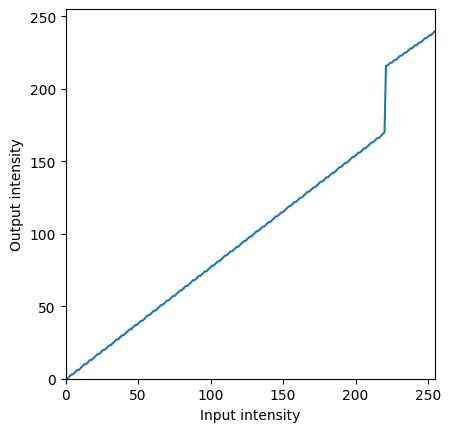

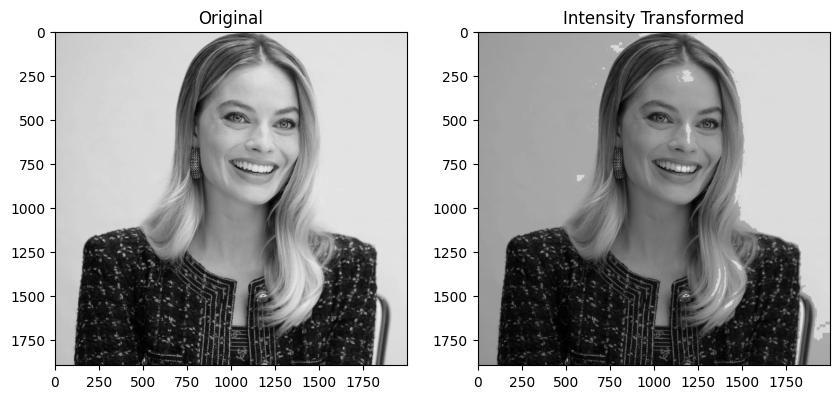

In [4]:

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

im1 = cv.imread(r"E:\5th Sem\IMG Processing\assignment_01_images\margot_golden_gray.jpg", cv.IMREAD_GRAYSCALE)
assert im1 is not None


c = np.array([(220,170),(220,215)])

t1 = np.linspace(0, c[0,1], c[0,0]+1-0).astype('uint8')
print(len(t1))
t2 = np.linspace(c[0,1], c[1,1], c[1,0]-c[0,0]).astype('uint8')
print(len(t2))
t3 = np.linspace(c[1,1]+1, 240, 255-c[1,0]).astype('uint8')
print(len(t3))

transform = np.concatenate((t1, t2)).astype('uint8')
transform = np.concatenate((transform, t3)).astype('uint8')
print(len(transform))


im2 = cv.LUT(im1, transform)


fig, ax = plt.subplots()
ax.plot(transform)
ax.set_xlabel('Input intensity')
ax.set_ylabel('Output intensity')
ax.set_xlim(0,255)
ax.set_ylim(0,255)
ax.set_aspect('equal')
plt.show()
fig, ax = plt.subplots(1,2, figsize=(10,10))
ax[0].imshow(im1, vmin=0, vmax=255, cmap='gray')
ax[0].set_title('Original')

ax[1].imshow(im2, vmin=0, vmax=255, cmap='gray')
ax[1].set_title('Intensity Transformed')
plt.show()


Question 2

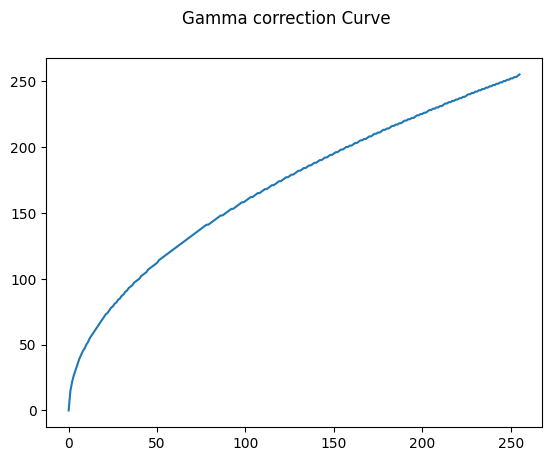

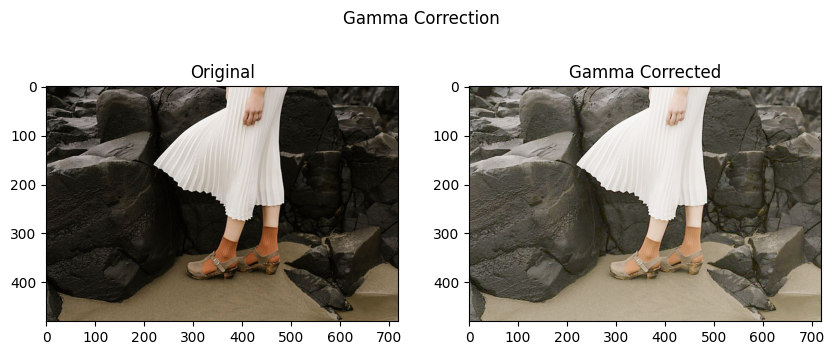

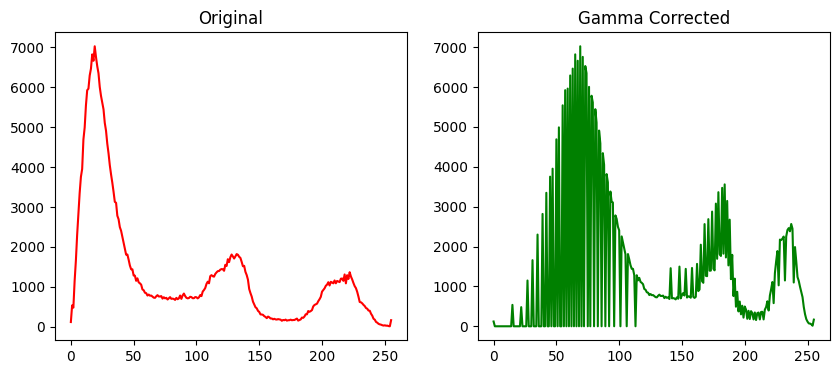

In [16]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

gamma = 0.5
f = cv.imread(r"C:\Users\Thamara\Desktop\imgprocessing\assignment_01_images\highlights_and_shadows.jpg")
f = cv.cvtColor(f, cv.COLOR_BGR2RGB)

t = np.array([(i/255.0)**(gamma)*255.0 for i in range(256)]).astype('uint8')   
g = cv.LUT(f, t)
plt.suptitle("Gamma correction Curve")
plt.plot(t)
plt.show()

fig, ax = plt.subplots(1,2, figsize=(10,4))
fig.suptitle('Gamma Correction')
ax[0].imshow(f)
ax[0].set_title('Original')
ax[1].imshow(g)
ax[1].set_title('Gamma Corrected')
plt.show()

plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.gca().set_title('Original')
f = cv.calcHist([f], [0], None, [256], [0,256])
plt.plot(f, color = 'r')

plt.subplot(1,2,2)
plt.gca().set_title('Gamma Corrected')
g = cv.calcHist([g], [0], None, [256], [0,256])
plt.plot(g, color = 'g')
plt.show()


Question 03

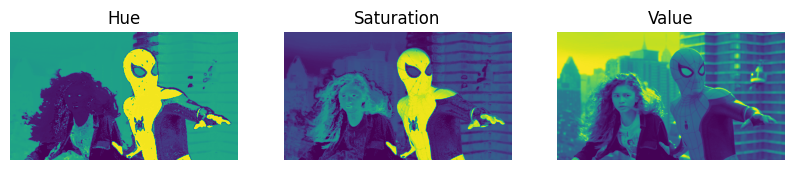

In [31]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


f = cv.imread(r"E:\5th Sem\IMG Processing\assignment_01_images\spider.png" , cv.IMREAD_COLOR)
assert f is not None
f = cv.cvtColor(f, cv.COLOR_BGR2HSV)
h_f,s_f,v_f = cv.split(f)

fig, ax= plt.subplots(1,3, figsize=(10,20))
ax[0].imshow(h_f)
ax[0].set_title('Hue')
ax[0].axis('off')
ax[1].imshow(s_f)
ax[1].set_title('Saturation')
ax[1].axis('off')
ax[2].imshow(v_f)
ax[2].set_title('Value')
ax[2].axis('off')
plt.show()





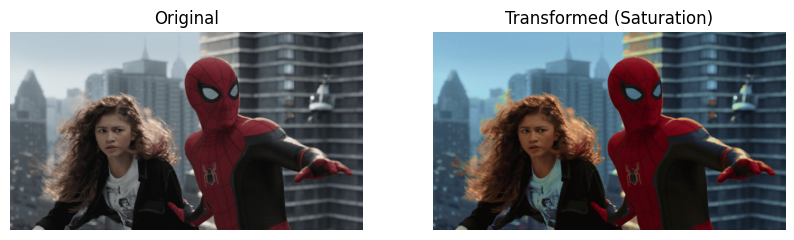

In [64]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

f = cv.imread(r"E:\5th Sem\IMG Processing\assignment_01_images\spider.png", cv.IMREAD_COLOR)
assert f is not None

x = cv.cvtColor(f, cv.COLOR_BGR2HSV)[:, :, 1]  # Extracting the Saturation channel
a = 0.5
sigma = 70
Y = np.minimum(x + a * 128 * np.exp(-(x - 128) ** 2 / (2 * sigma ** 2)), 255).astype('uint8')

# Creating the transformed image in HSV color space
transformed_image = cv.merge((cv.cvtColor(f, cv.COLOR_BGR2HSV)[:, :, 0], Y, cv.cvtColor(f, cv.COLOR_BGR2HSV)[:, :, 2]))

fig, ax = plt.subplots(1, 2, figsize=(10, 10))
ax[0].imshow(cv.cvtColor(f, cv.COLOR_BGR2RGB))
ax[0].set_title('Original')
ax[0].axis('off')
ax[1].imshow(cv.cvtColor(transformed_image, cv.COLOR_HSV2RGB))
ax[1].set_title('Transformed (Saturation)')
ax[1].axis('off')
plt.show()
